# Assignment - INVESTMENT STRATEGIES

### Importing required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the stock files

In [2]:
all_stocks = os.listdir('./stocks/')

In [3]:
all_stocks

['AAPL.csv',
 'BAC.csv',
 'DIS.csv',
 'FB.csv',
 'INTC.csv',
 'JNJ.csv',
 'JPM.csv',
 'MSFT.csv',
 'TSLA.csv',
 'V.csv']

### Creating a single dataframe from every Stock's CSV file

In [4]:

all_stocks_df = pd.DataFrame()
for stock in all_stocks:
    stock_name = stock.split('.')[0]
    stock_df = pd.read_csv(os.path.join('./stocks/',stock), header=0)
    stock_df[['Date',stock_name]] = stock_df['Date|StockPrice'].str.split('|',expand=True)
    stock_df[stock_name] = stock_df[stock_name].astype('float64')
    stock_df.drop(columns =['Date|StockPrice'], inplace = True)
    stock_df.set_index('Date',inplace=True)
    all_stocks_df = pd.concat([all_stocks_df,stock_df],axis =1)


### Reversing the data according to index as we need to start from 2015-01-02 till date 

In [5]:
all_stocks_df = all_stocks_df.reindex(index=all_stocks_df.index[::-1])

In [6]:
all_stocks_df.head(10)

,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,TSLA,V
Date,,,,,,,,,,
2015-01-02,100.454296,16.552712,87.899755,78.450,31.626549,91.111915,55.128124,41.979164,219.310,63.999397
2015-01-05,97.624339,16.071851,86.615247,77.190,31.269924,90.475561,53.416674,41.588639,210.090,62.586687
2015-01-06,97.633527,15.590990,86.155824,76.150,30.687147,90.030985,52.031634,40.982652,211.280,62.183400
2015-01-07,99.002565,15.664969,87.037166,76.150,31.330811,92.018501,52.111031,41.503352,210.950,63.016537
2015-01-08,102.806468,15.988625,87.937259,78.175,31.913589,92.742027,53.275523,42.724303,210.615,63.861748
2015-01-09,102.916726,15.701958,88.368554,77.740,31.974476,91.478036,52.349222,42.365200,206.660,62.915112
2015-01-12,100.380790,15.424538,88.565449,76.720,31.835305,91.164218,51.899305,41.835522,202.210,62.791952
2015-01-13,101.272043,15.211850,89.249895,76.450,31.748324,91.321127,51.908127,41.615572,204.250,62.975484
2015-01-14,100.886140,14.832709,88.349802,76.280,31.617851,90.658622,50.117279,41.256469,192.690,61.714912


### Getting an idea about the data in the stocks dataframe

In [7]:
all_stocks_df.describe()

,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,TSLA,V
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,147.001252,22.133048,106.038501,141.931730,38.122436,114.162526,83.495540,76.839089,266.918019,106.188698
std,42.954938,6.524493,13.644933,37.553721,9.291775,17.575820,23.143329,31.783033,54.554514,36.545519
min,85.395104,10.445477,84.327149,74.050000,23.017089,80.839068,47.973554,36.269423,143.670000,59.493214
25%,108.092555,15.227216,96.773480,110.712500,29.897356,97.864249,59.378242,49.203735,220.310000,75.665498
50%,143.801548,22.866411,103.225493,144.125000,34.051294,117.719064,84.843157,67.081105,255.705000,93.214711
75%,179.899315,28.455749,110.451447,176.110000,46.687740,129.353625,105.518564,103.531677,314.830000,136.464359
max,267.100000,33.470000,149.690000,217.500000,58.810000,143.786766,131.490000,151.230000,385.000000,185.429415


In [8]:
stock_names=all_stocks_df.columns
print(stock_names)

Index(['AAPL', 'BAC', 'DIS', 'FB', 'INTC', 'JNJ', 'JPM', 'MSFT', 'TSLA', 'V'], dtype='object')


### Ranking the stocks based on their price on each day

In [9]:
arank = all_stocks_df.apply(np.argsort, axis=1)

### Introducing columns for the 3 highest stocks 

In [10]:
high_stocks_cols = all_stocks_df.columns.to_series()[arank.values[:,::-1][:,:3]]
high_stocks_df = pd.DataFrame(high_stocks_cols, index=all_stocks_df.index, columns=['high_1','high_2','high_3'])
high_stocks_df.head()
all_stocks_df = pd.concat([all_stocks_df, high_stocks_df], axis=1)
all_stocks_df.head()

,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,TSLA,V,high_1,high_2,high_3
Date,,,,,,,,,,,,,
2015-01-02,100.454296,16.552712,87.899755,78.450,31.626549,91.111915,55.128124,41.979164,219.310,63.999397,TSLA,AAPL,JNJ
2015-01-05,97.624339,16.071851,86.615247,77.190,31.269924,90.475561,53.416674,41.588639,210.090,62.586687,TSLA,AAPL,JNJ
2015-01-06,97.633527,15.590990,86.155824,76.150,30.687147,90.030985,52.031634,40.982652,211.280,62.183400,TSLA,AAPL,JNJ
2015-01-07,99.002565,15.664969,87.037166,76.150,31.330811,92.018501,52.111031,41.503352,210.950,63.016537,TSLA,AAPL,JNJ
2015-01-08,102.806468,15.988625,87.937259,78.175,31.913589,92.742027,53.275523,42.724303,210.615,63.861748,TSLA,AAPL,JNJ


### Introducing columns for the 3 lowest stocks 

In [11]:
low_stocks_cols = all_stocks_df.columns.to_series()[arank.values[:,::-1][:,-3:]]
low_stocks_df = pd.DataFrame(low_stocks_cols, index=all_stocks_df.index, columns=['low_3','low_2','low_1'])
low_stocks_df.head()
all_stocks_df = pd.concat([all_stocks_df, low_stocks_df], axis=1)
all_stocks_df.head()

,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,TSLA,V,high_1,high_2,high_3,low_3,low_2,low_1
Date,,,,,,,,,,,,,,,,
2015-01-02,100.454296,16.552712,87.899755,78.450,31.626549,91.111915,55.128124,41.979164,219.310,63.999397,TSLA,AAPL,JNJ,MSFT,INTC,BAC
2015-01-05,97.624339,16.071851,86.615247,77.190,31.269924,90.475561,53.416674,41.588639,210.090,62.586687,TSLA,AAPL,JNJ,MSFT,INTC,BAC
2015-01-06,97.633527,15.590990,86.155824,76.150,30.687147,90.030985,52.031634,40.982652,211.280,62.183400,TSLA,AAPL,JNJ,MSFT,INTC,BAC
2015-01-07,99.002565,15.664969,87.037166,76.150,31.330811,92.018501,52.111031,41.503352,210.950,63.016537,TSLA,AAPL,JNJ,MSFT,INTC,BAC
2015-01-08,102.806468,15.988625,87.937259,78.175,31.913589,92.742027,53.275523,42.724303,210.615,63.861748,TSLA,AAPL,JNJ,MSFT,INTC,BAC


### Stimulating stock strategy for the 3 highest stocks

In [12]:
# Setting values for stocks on first date i.e. 2015-01-02 with highest parameters
all_stocks_df.reset_index(inplace=True)
all_stocks_df.loc[0,'Total_by_highest'] = 100
investment_per_stock = all_stocks_df.loc[0,'Total_by_highest']/3
all_stocks_df.loc[0,'high_3_unit'] = investment_per_stock / all_stocks_df.loc[0,all_stocks_df.loc[0,'high_3']]
all_stocks_df.loc[0,'high_2_unit'] = investment_per_stock / all_stocks_df.loc[0,all_stocks_df.loc[0,'high_2']]
all_stocks_df.loc[0,'high_1_unit'] = investment_per_stock / all_stocks_df.loc[0,all_stocks_df.loc[0,'high_1']]


# Stimulating values for stocks on dates after 2015-01-02 with highest parameters
for i in range(1, len(all_stocks_df)):
    all_stocks_df.loc[i, 'Total_by_highest'] = (all_stocks_df.loc[i-1, 'high_3_unit'] * all_stocks_df.loc[i,all_stocks_df.loc[i-1,'high_3']]) + (all_stocks_df.loc[i-1, 'high_2_unit'] * all_stocks_df.loc[i,all_stocks_df.loc[i-1,'high_2']]) + (all_stocks_df.loc[i-1, 'high_1_unit'] * all_stocks_df.loc[i,all_stocks_df.loc[i-1,'high_1']])
    amount = all_stocks_df.loc[i, 'Total_by_highest']
    investment_per_stock = all_stocks_df.loc[i,'Total_by_highest']/3
    all_stocks_df.loc[i,'high_3_unit'] = investment_per_stock / all_stocks_df.loc[i,all_stocks_df.loc[i,'high_3']]
    all_stocks_df.loc[i,'high_2_unit'] = investment_per_stock / all_stocks_df.loc[i,all_stocks_df.loc[i,'high_2']]
    all_stocks_df.loc[i,'high_1_unit'] = investment_per_stock / all_stocks_df.loc[i,all_stocks_df.loc[i,'high_1']]

In [13]:
all_stocks_df.head()

,Date,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,TSLA,...,high_1,high_2,high_3,low_3,low_2,low_1,Total_by_highest,high_3_unit,high_2_unit,high_1_unit
0,2015-01-02,100.454296,16.552712,87.899755,78.450,31.626549,91.111915,55.128124,41.979164,219.310,...,TSLA,AAPL,JNJ,MSFT,INTC,BAC,100.000000,0.365850,0.331826,0.151992
1,2015-01-05,97.624339,16.071851,86.615247,77.190,31.269924,90.475561,53.416674,41.588639,210.090,...,TSLA,AAPL,JNJ,MSFT,INTC,BAC,97.426772,0.358943,0.332659,0.154579
2,2015-01-06,97.633527,15.590990,86.155824,76.150,30.687147,90.030985,52.031634,40.982652,211.280,...,TSLA,AAPL,JNJ,MSFT,INTC,BAC,97.454200,0.360817,0.332721,0.153752
3,2015-01-07,99.002565,15.664969,87.037166,76.150,31.330811,92.018501,52.111031,41.503352,210.950,...,TSLA,AAPL,JNJ,MSFT,INTC,BAC,98.576100,0.357088,0.331897,0.155765
4,2015-01-08,102.806468,15.988625,87.937259,78.175,31.913589,92.742027,53.275523,42.724303,210.615,...,TSLA,AAPL,JNJ,MSFT,INTC,BAC,100.044787,0.359581,0.324379,0.158338


### Stimulating stock strategy for the 3 lowest stocks

In [14]:
# Setting values for stocks on first date i.e. 2015-01-02 with lowest parameters
all_stocks_df.reset_index(inplace=True)
all_stocks_df.loc[0,'Total_by_lowest'] = 100
investment_per_stock = all_stocks_df.loc[0,'Total_by_lowest']/3
all_stocks_df.loc[0,'low_3_unit'] = investment_per_stock / all_stocks_df.loc[0,all_stocks_df.loc[0,'low_3']]
all_stocks_df.loc[0,'low_2_unit'] = investment_per_stock / all_stocks_df.loc[0,all_stocks_df.loc[0,'low_2']]
all_stocks_df.loc[0,'low_1_unit'] = investment_per_stock / all_stocks_df.loc[0,all_stocks_df.loc[0,'low_1']]


# Stimulating values for stocks on dates after 2015-01-02 with highest parameters
for i in range(1, len(all_stocks_df)):
    all_stocks_df.loc[i, 'Total_by_lowest'] = (all_stocks_df.loc[i-1, 'low_3_unit'] * all_stocks_df.loc[i,all_stocks_df.loc[i-1,'low_3']]) + (all_stocks_df.loc[i-1, 'low_2_unit'] * all_stocks_df.loc[i,all_stocks_df.loc[i-1,'low_2']]) + (all_stocks_df.loc[i-1, 'low_1_unit'] * all_stocks_df.loc[i,all_stocks_df.loc[i-1,'low_1']])
    amount = all_stocks_df.loc[i, 'Total_by_lowest']
    investment_per_stock = all_stocks_df.loc[i,'Total_by_lowest']/3
    all_stocks_df.loc[i,'low_3_unit'] = investment_per_stock / all_stocks_df.loc[i,all_stocks_df.loc[i,'low_3']]
    all_stocks_df.loc[i,'low_2_unit'] = investment_per_stock / all_stocks_df.loc[i,all_stocks_df.loc[i,'low_2']]
    all_stocks_df.loc[i,'low_1_unit'] = investment_per_stock / all_stocks_df.loc[i,all_stocks_df.loc[i,'low_1']]

### Lets see which strategy gives us the best returns

In [15]:
all_stocks_df.tail()

,index,Date,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,...,low_2,low_1,Total_by_highest,high_3_unit,high_2_unit,high_1_unit,Total_by_lowest,low_3_unit,low_2_unit,low_1_unit
1229,1229,2019-11-19,266.29,32.94,148.38,199.32,58.35,133.892362,130.58,149.88,...,INTC,BAC,204.431252,0.341881,0.255901,0.189541,264.269988,0.674606,1.509683,2.674256
1230,1230,2019-11-20,263.19,32.69,146.93,197.51,57.90,135.004656,129.63,149.62,...,INTC,BAC,201.635506,0.340296,0.255374,0.190823,262.281191,0.674435,1.509967,2.674428
1231,1231,2019-11-21,262.01,32.84,146.90,197.93,58.22,135.501215,129.93,149.48,...,INTC,BAC,201.975139,0.340146,0.256956,0.189739,263.367875,0.675666,1.507889,2.673243
1232,1232,2019-11-22,261.78,33.18,148.29,198.82,57.61,137.120000,130.79,149.59,...,INTC,BAC,198.084358,0.332100,0.252228,0.198259,263.938038,0.672676,1.527154,2.651578
1233,1233,2019-11-25,266.37,33.47,149.69,199.79,58.81,137.180000,131.49,151.23,...,INTC,BAC,200.218474,0.334048,0.250552,0.198429,267.010454,0.676884,1.513407,2.659202


# From the above data it is clear that strategy 2 i.e. (stocks that gave the LOWEST returns on the previous day will give the highest returns on the current day) gives better returns on our Investment of \\$100 turns out to be \\$267.01 while for Strategy 1 it was \\$200.22

### Reseting the index to Date as we will need to plot graphs

In [16]:
all_stocks_df.set_index(["Date"], inplace = True)
all_stocks_df.drop(columns=['index'], inplace = True)

In [17]:
all_stocks_df.head()

,AAPL,BAC,DIS,FB,INTC,JNJ,JPM,MSFT,TSLA,V,...,low_2,low_1,Total_by_highest,high_3_unit,high_2_unit,high_1_unit,Total_by_lowest,low_3_unit,low_2_unit,low_1_unit
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,100.454296,16.552712,87.899755,78.450,31.626549,91.111915,55.128124,41.979164,219.310,63.999397,...,INTC,BAC,100.000000,0.365850,0.331826,0.151992,100.000000,0.794045,1.053967,2.013769
2015-01-05,97.624339,16.071851,86.615247,77.190,31.269924,90.475561,53.416674,41.588639,210.090,62.586687,...,INTC,BAC,97.426772,0.358943,0.332659,0.154579,98.345692,0.788242,1.048352,2.039709
2015-01-06,97.633527,15.590990,86.155824,76.150,30.687147,90.030985,52.031634,40.982652,211.280,62.183400,...,INTC,BAC,97.454200,0.360817,0.332721,0.153752,96.276256,0.783065,1.045783,2.058374
2015-01-07,99.002565,15.664969,87.037166,76.150,31.330811,92.018501,52.111031,41.503352,210.950,63.016537,...,INTC,BAC,98.576100,0.357088,0.331897,0.155765,97.509407,0.783145,1.037418,2.074893
2015-01-08,102.806468,15.988625,87.937259,78.175,31.913589,92.742027,53.275523,42.724303,210.615,63.861748,...,INTC,BAC,100.044787,0.359581,0.324379,0.158338,99.741724,0.778181,1.041789,2.079431


In [18]:
returns_csv = all_stocks_df.to_csv ('./returns.csv', header=True) 

### Plot for Strategy 1 (Highest) Implementation

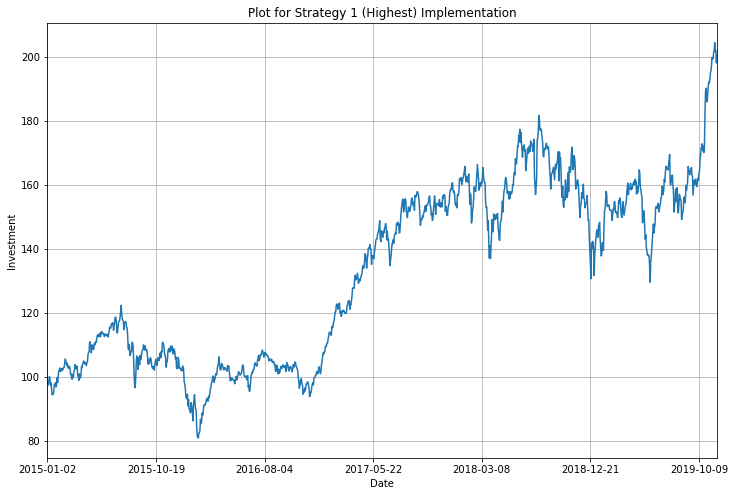

In [19]:
strategy_1_highest = all_stocks_df['Total_by_highest'].plot(figsize=(12,8), title = 'Plot for Strategy 1 (Highest) Implementation', grid=True)
strategy_1_highest.set_xlabel("Date")
strategy_1_highest.set_ylabel("Investment")
plt.savefig("Strategy_1_HIGHEST.png", bbox_inches="tight")
plt.show()


### Plot for Strategy 2 (Lowest) Implementation

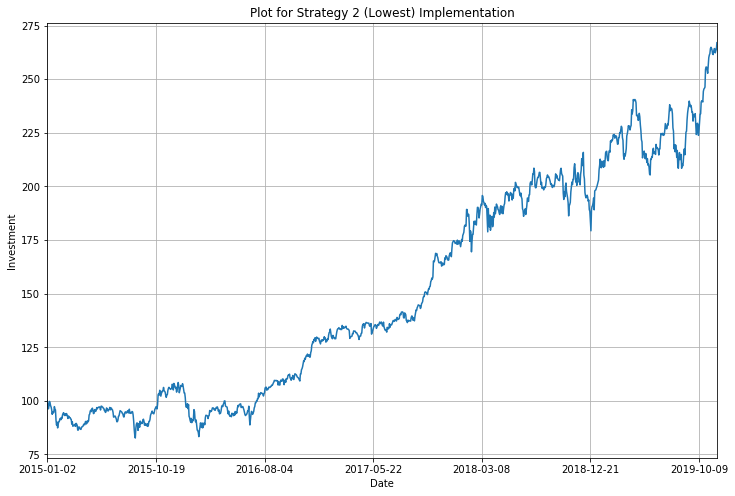

In [20]:
strategy_1_lowest = all_stocks_df['Total_by_lowest'].plot(x='Date', y= 'Investment', figsize=(12,8), title = 'Plot for Strategy 2 (Lowest) Implementation', grid=True)
strategy_1_lowest.set_xlabel("Date")
strategy_1_lowest.set_ylabel("Investment")
plt.savefig("Strategy_2_LOWEST.png", bbox_inches="tight")
plt.show()


### Plot for Comparison of the 2 strategies

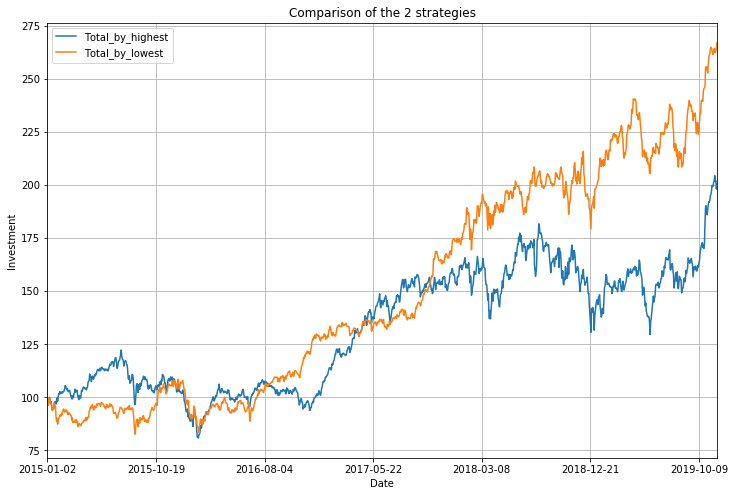

In [21]:
strategy_1_2_comparison= all_stocks_df[['Total_by_highest','Total_by_lowest']].plot(figsize=(12,8), title = 'Comparison of the 2 strategies', grid=True)
strategy_1_2_comparison.set_xlabel("Date")
strategy_1_2_comparison.set_ylabel("Investment")
plt.savefig("Strategy_1_2_Comparison.png", bbox_inches="tight")
plt.show()